Primero cargamos el dataset

In [38]:
import pandas as pd

df = pd.read_csv("CO2 Emissions_Canada.csv")

Vemos los 5 primeros registros y los 5 ultimos


In [50]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,ACURA,ILX,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [40]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


Ahora vemos que tipos de variables nos encontramos

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Miramos si hay valores nulos

In [42]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [43]:
transmission_unique = df['Transmission'].unique()
vehicle_class_unique = df['Vehicle Class'].unique()
fuel_type_unique = df['Fuel Type'].unique()

print("Valores únicos de Fuel Type:", fuel_type_unique)
print("Valores únicos de Transmission:", transmission_unique)
print("Valores únicos de Vehicle Class:", vehicle_class_unique)

Valores únicos de Fuel Type: ['Z' 'D' 'X' 'E' 'N']
Valores únicos de Transmission: ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
Valores únicos de Vehicle Class: ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


Ahora vamos a convertir los campos Transmission, Vehicle Class y Fuel Type a numéricos, para así poder hacer la matriz de correlación

## Transmission:

AS5 = 0, M6 = 1, AV7 = 2, AS6 = 3, AM6 = 4, A6 = 5, AM7 = 6, AV8 = 7, AS8 = 8, A7 = 9, A8 = 10, M7 = 11, A4 = 12, M5 = 13, AV = 14, A5 = 15, AS7 = 16, A9 = 17, AS9 = 18, AV6 = 19, AS4 = 20, AM5 = 21, AM8 = 22, AM9 = 23, AS10 = 24, A10 = 25, AV10 = 26

## Vehicle class:

COMPACT = 0, SUV - SMALL = 1, MID-SIZE = 2, TWO-SEATER = 3, MINICOMPACT = 4, SUBCOMPACT = 5, FULL-SIZE = 6, STATION WAGON - SMALL = 7, SUV - STANDARD = 8, VAN - CARGO = 9, VAN - PASSENGER = 10, PICKUP TRUCK - STANDARD = 11, MINIVAN = 12, SPECIAL PURPOSE VEHICLE = 13, STATION WAGON MID-SIZE = 14, PICKUP TRUCK - SMALL = 15 

## Fuel type:

Z = 0, D = 1, X = 2, E = 3, N = 4


In [44]:
# Mapear los valores de la columna 'Transmission' a los nuevos valores
mapeo_transmission = {
    'AS5': 0, 'M6': 1, 'AV7': 2, 'AS6': 3, 'AM6': 4, 'A6': 5, 'AM7': 6, 'AV8': 7,
    'AS8': 8, 'A7': 9, 'A8': 10, 'M7': 11, 'A4': 12, 'M5': 13, 'AV': 14, 'A5': 15,
    'AS7': 16, 'A9': 17, 'AS9': 18, 'AV6': 19, 'AS4': 20, 'AM5': 21, 'AM8': 22,
    'AM9': 23, 'AS10': 24, 'A10': 25, 'AV10': 26
}

# Realizar el reemplazo con el mapeo
df['Transmission'] = df['Transmission'].replace(mapeo_transmission)

# Mostrar los primeros registros para verificar el cambio
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0  ACURA         ILX       COMPACT             2.0          4             0   
1  ACURA         ILX       COMPACT             2.4          4             1   
2  ACURA  ILX HYBRID       COMPACT             1.5          4             2   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6             3   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6             3   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2             

C:\Users\vedruna\AppData\Local\Temp\ipykernel_11556\3716548093.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission'] = df['Transmission'].replace(mapeo_transmission)


Ahora hacemos lo mismo para la columna Fuel type

In [45]:
mapeo_fuel_type = {
    'Z': 0, 'D': 1, 'X': 2, 'E': 3, 'N': 4
}

# Realizar el reemplazo con el mapeo
df['Fuel Type'] = df['Fuel Type'].replace(mapeo_fuel_type)

# Mostrar los primeros registros para verificar el cambio
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0  ACURA         ILX       COMPACT             2.0          4             0   
1  ACURA         ILX       COMPACT             2.4          4             1   
2  ACURA  ILX HYBRID       COMPACT             1.5          4             2   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6             3   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6             3   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          0                               9.9   
1          0                              11.2   
2          0                               6.0   
3          0                              12.7   
4          0                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2       

C:\Users\vedruna\AppData\Local\Temp\ipykernel_11556\680916172.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel Type'] = df['Fuel Type'].replace(mapeo_fuel_type)


Ahora hacemos lo mismo con Vehicle class

In [46]:
mapeo_vehicle_class = {
    'COMPACT': 0, 'SUV - SMALL': 1, 'MID-SIZE': 2, 'TWO-SEATER': 3, 'MINICOMPACT': 4,
    'SUBCOMPACT': 5, 'FULL-SIZE': 6, 'STATION WAGON - SMALL': 7, 'SUV - STANDARD': 8,
    'VAN - CARGO': 9, 'VAN - PASSENGER': 10, 'PICKUP TRUCK - STANDARD': 11,
    'MINIVAN': 12, 'SPECIAL PURPOSE VEHICLE': 13, 'STATION WAGON - MID-SIZE': 14,
    'PICKUP TRUCK - SMALL': 15
}

# Realizar el reemplazo con el mapeo
df['Vehicle Class'] = df['Vehicle Class'].replace(mapeo_vehicle_class)

# Mostrar los primeros registros para verificar el cambio
print(df.head())

    Make       Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0  ACURA         ILX              0             2.0          4             0   
1  ACURA         ILX              0             2.4          4             1   
2  ACURA  ILX HYBRID              0             1.5          4             2   
3  ACURA     MDX 4WD              1             3.5          6             3   
4  ACURA     RDX AWD              1             3.5          6             3   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          0                               9.9   
1          0                              11.2   
2          0                               6.0   
3          0                              12.7   
4          0                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2 

C:\Users\vedruna\AppData\Local\Temp\ipykernel_11556\4222779543.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle Class'] = df['Vehicle Class'].replace(mapeo_vehicle_class)


Ahora vamos a hacer una matriz de correlación

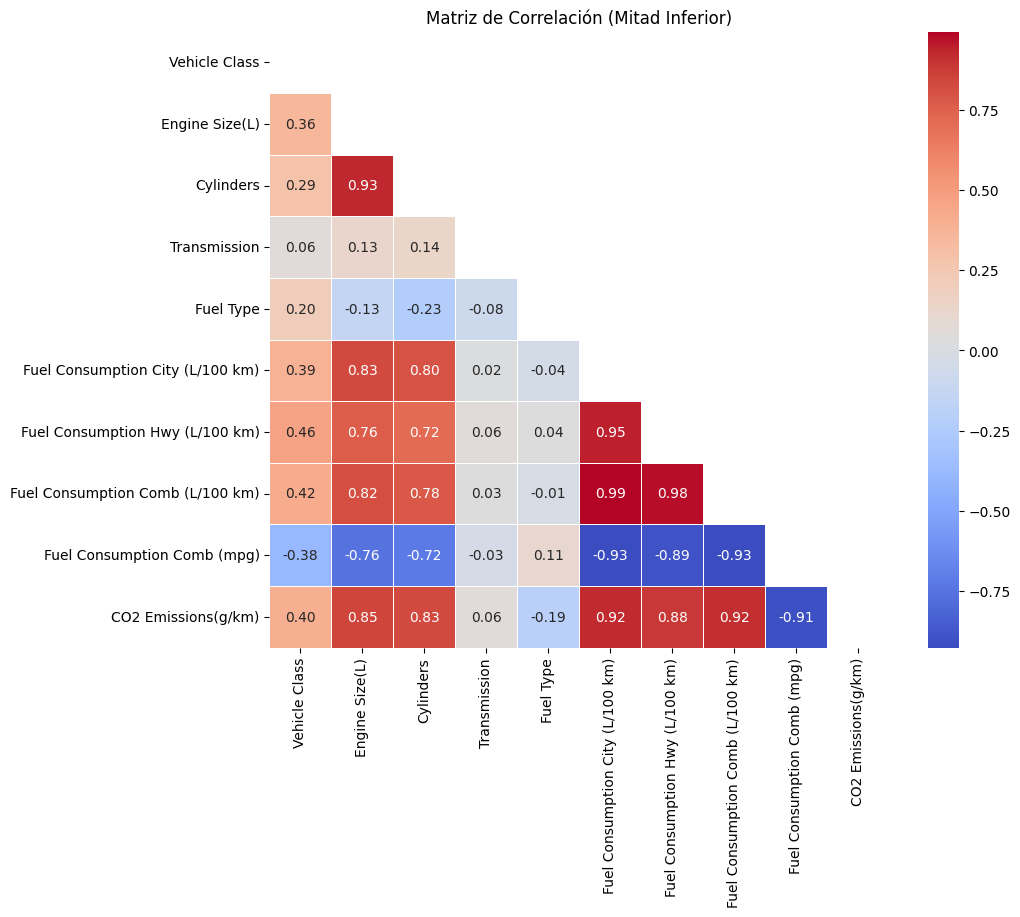

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear un nuevo DataFrame sin las columnas 'Make' y 'Model'
columnas_a_incluir = [col for col in df.columns if col not in ['Make', 'Model']]
df_sin_columnas_ignoradas = df[columnas_a_incluir]

# Calcular la matriz de correlación
matriz_correlacion = df_sin_columnas_ignoradas.corr()

# Crear una máscara para mostrar solo la mitad inferior de la matriz de correlación
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación (Mitad Inferior)')
plt.show()

Como se puede ver tenemos mucha correlación entre los siguientes campos: Cilindros y emisiones de CO2, Tamaño del motor con emisiones de CO2, etc.

## Boxplot

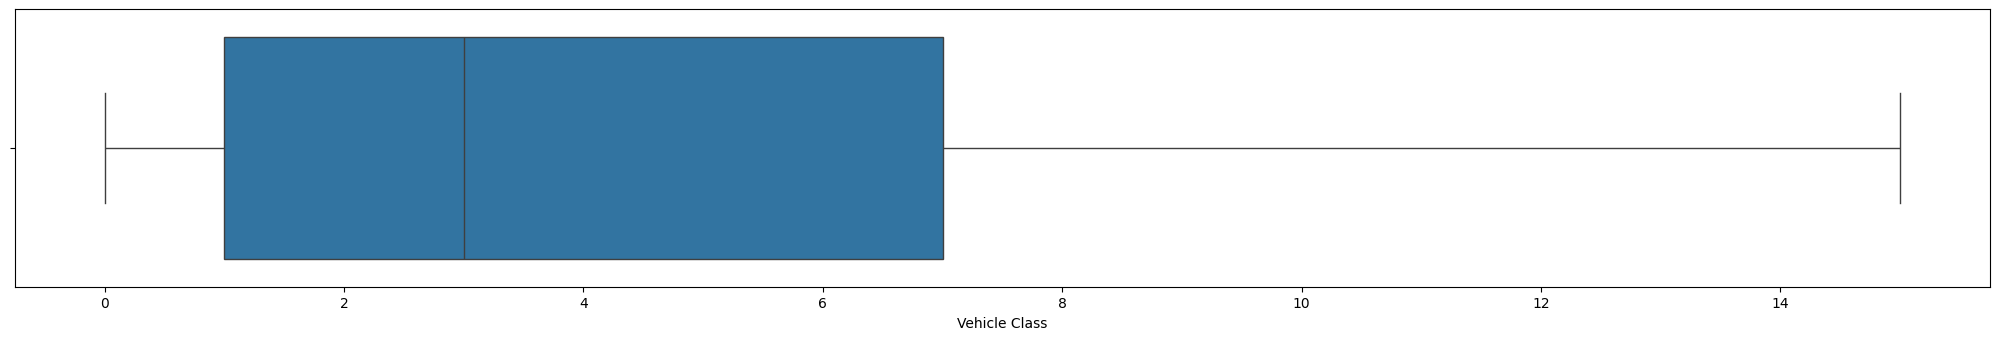

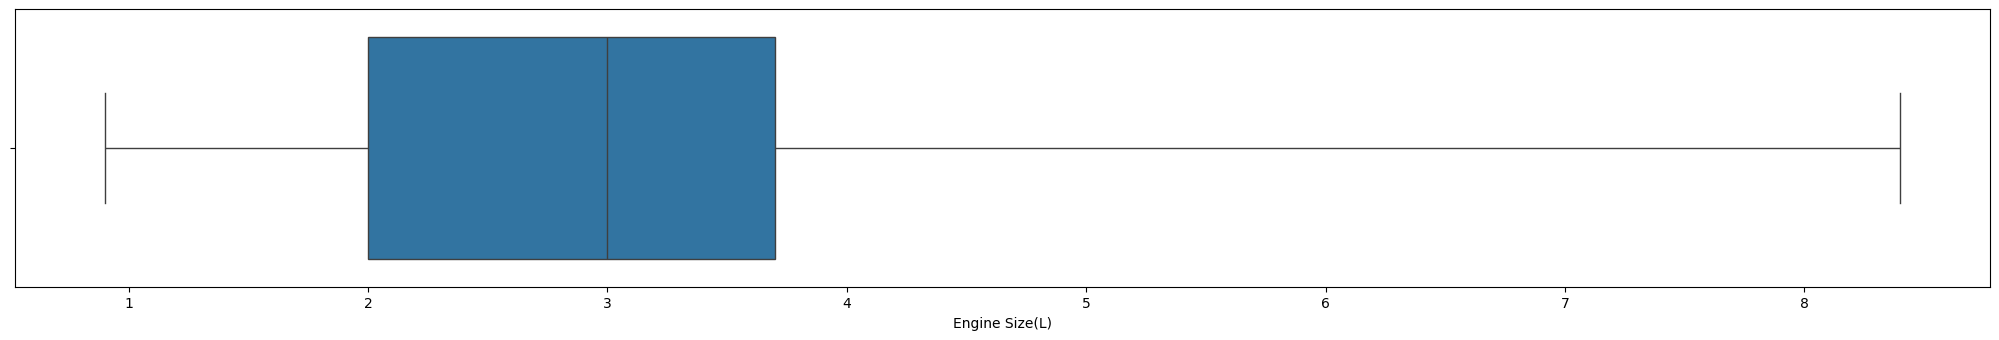

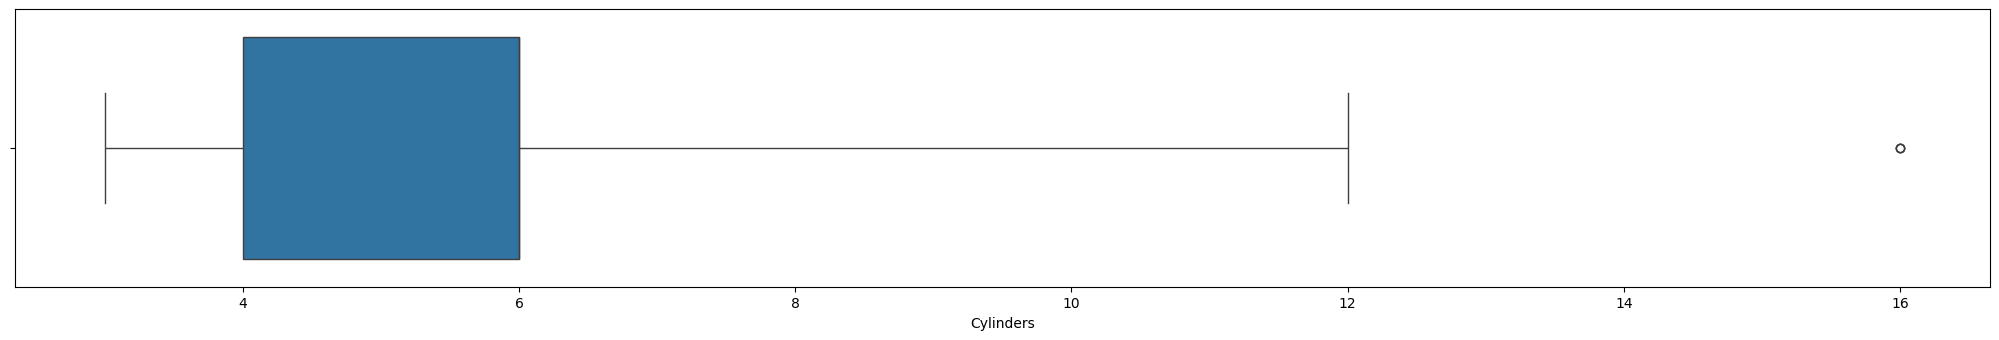

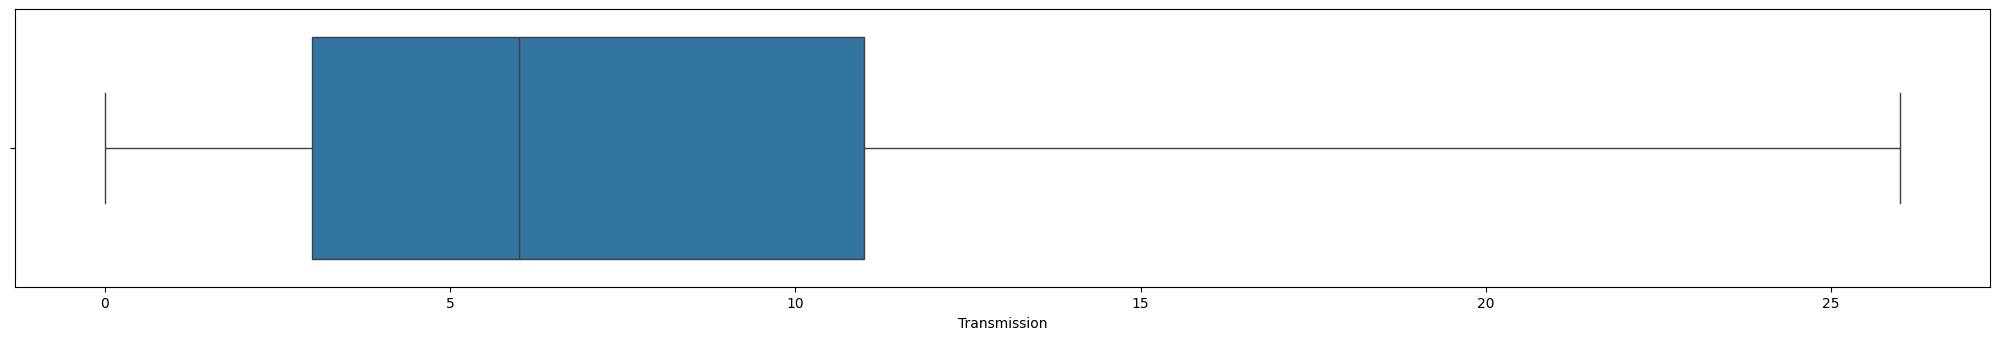

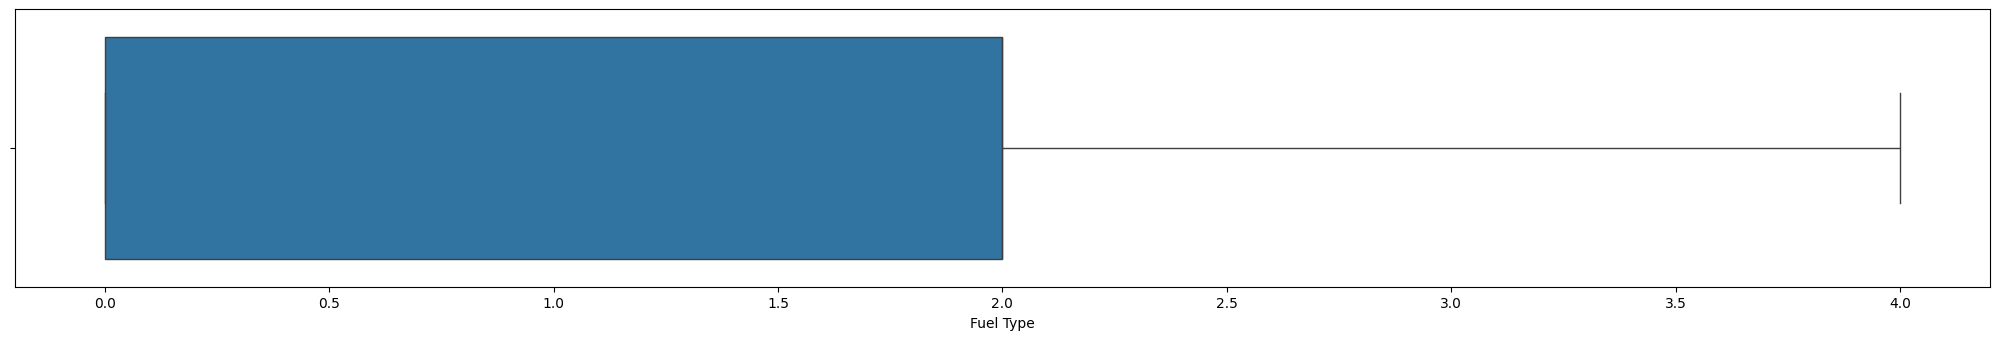

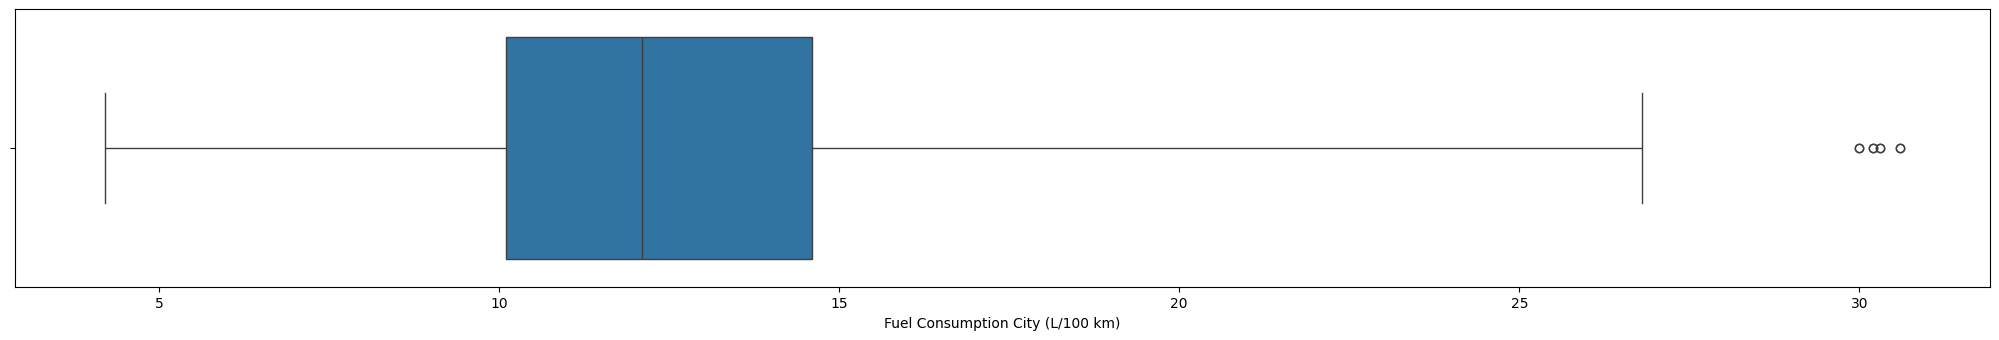

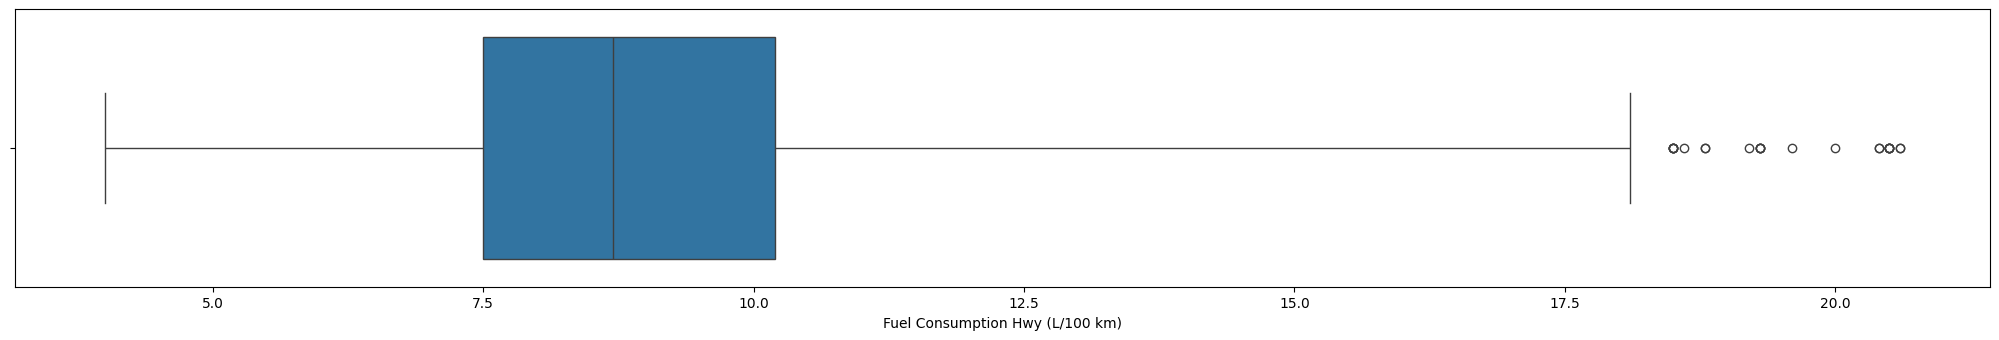

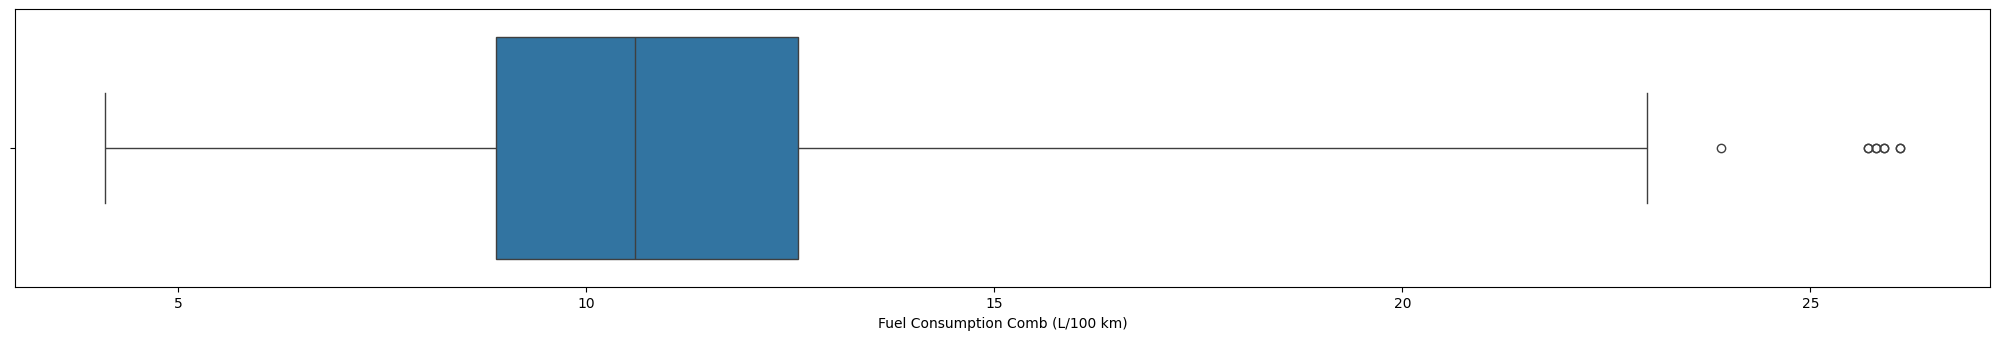

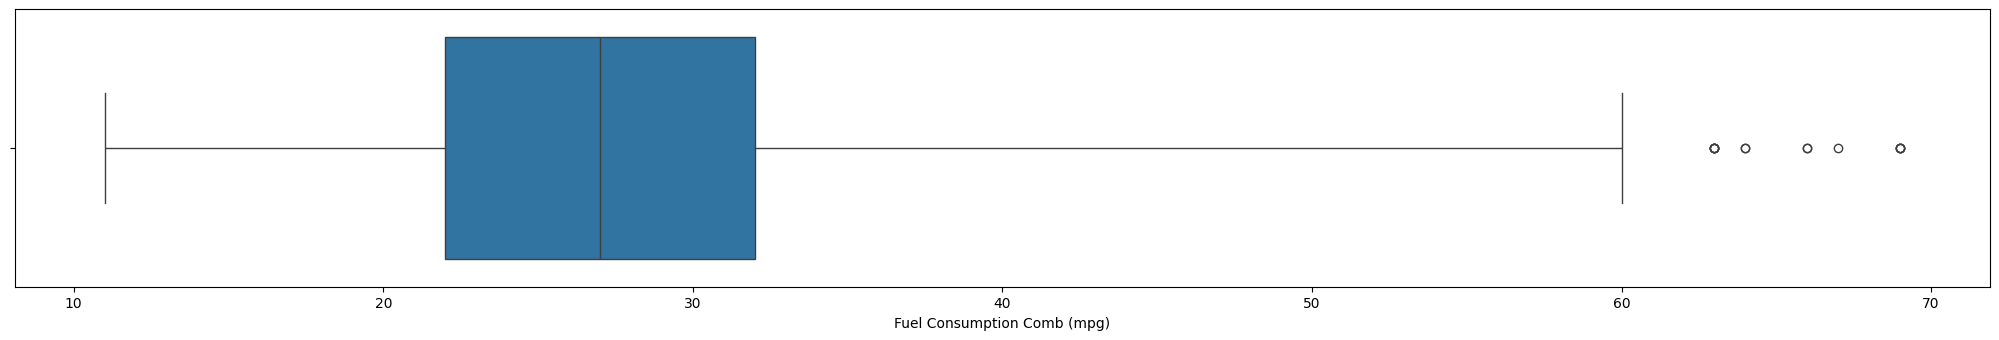

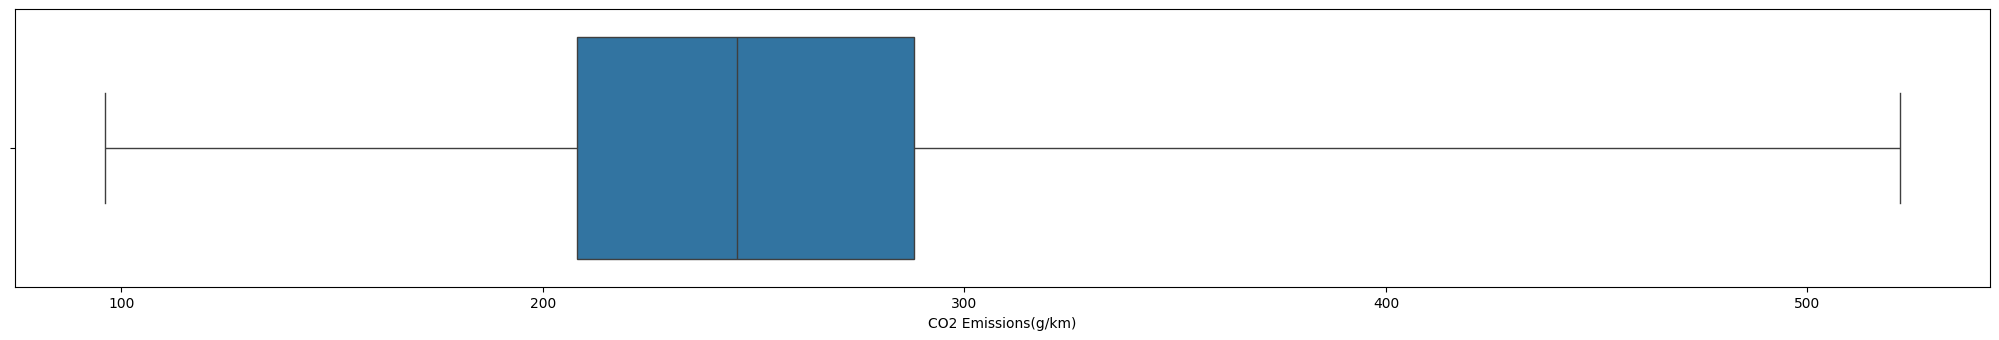

In [48]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

Con esta funcion consultamos los valores unicos del dataset, si hay 5 o menos los muestra, si no, unicamente muestra el numero de valores unicos

In [61]:
def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # Si el número de valores únicos en la columna es menor o igual a 5
        if df.loc[:, col].nunique() <= 10:
            # Obtener los valores únicos en la columna.
            unique_values = df.loc[:, col].unique()
            # Añadir el nombre de la columna, el número de valores únicos, los valores únicos y el tipo de datos al resultado.
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # De otra manera, añade solamente el nombre de la columna, el número de valores únicos y el tipo de dato al resultado.
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Nombre de la columna', 'Numero de valores unicos', ' Valores unicos ', 'Data Type'])

    return output_df
get_unique_values(df)

,Nombre de la columna,Numero de valores unicos,Valores unicos,Data Type
0,Make,42,-,object
1,Model,2053,-,object
2,Vehicle Class,16,-,int64
3,Engine Size(L),51,-,float64
4,Cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,Transmission,27,-,int64
6,Fuel Type,5,"[0, 1, 2, 3, 4]",int64
7,Fuel Consumption City (L/100 km),211,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),181,-,float64


Ahora voy a renombrar las columnas para que sean mas sencillas de entender

In [62]:
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

Ahora vamos a ver las marcas que mas coches tienen en el dataset

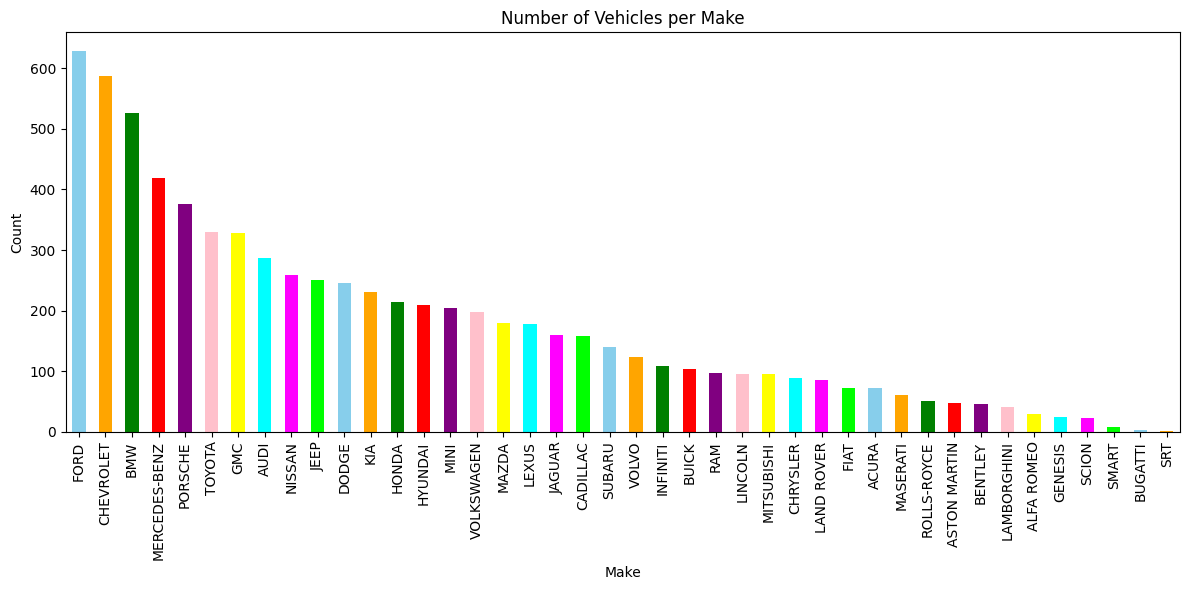

In [80]:
import matplotlib.pyplot as plt

# Contamos los registros de cada tipo en la columna 'make'
count_per_make = df['make'].value_counts()

# Definimos una lista de colores para cada barra
colores = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime']

# Graficamos el resultado
plt.figure(figsize=(12, 6))
count_per_make.plot(kind='bar', color=colores)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Vehicles per Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


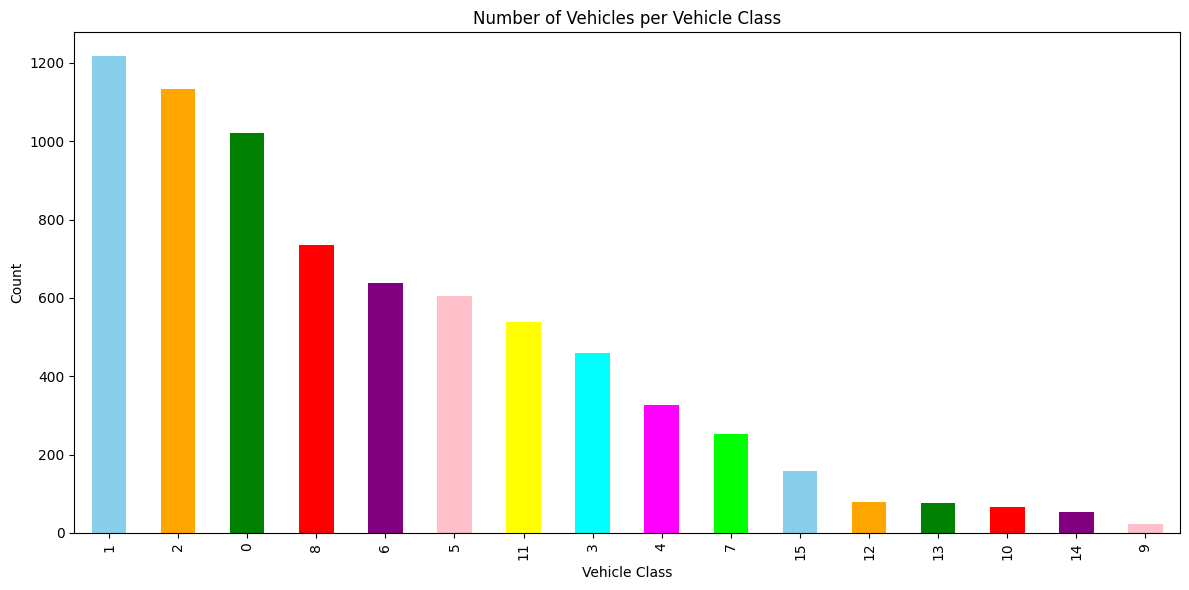

In [82]:
# Contamos los registros de cada tipo en la columna 'vehicle_class'
count_per_class = df['vehicle_class'].value_counts()

# Definimos una lista de colores para cada barra
colores = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime']

# Graficamos el resultado
plt.figure(figsize=(12, 6))
count_per_class.plot(kind='bar', color=colores)
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.title('Number of Vehicles per Vehicle Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Recordemos que: COMPACT = 0, SUV - SMALL = 1, MID-SIZE = 2, TWO-SEATER = 3, MINICOMPACT = 4, SUBCOMPACT = 5, FULL-SIZE = 6,
# STATION WAGON - SMALL = 7, SUV - STANDARD = 8, VAN - CARGO = 9, VAN - PASSENGER = 10, PICKUP TRUCK - STANDARD = 11,
# MINIVAN = 12, SPECIAL PURPOSE VEHICLE = 13, STATION WAGON MID-SIZE = 14, PICKUP TRUCK - SMALL = 15 

Ahora lo mismo con fuel_type

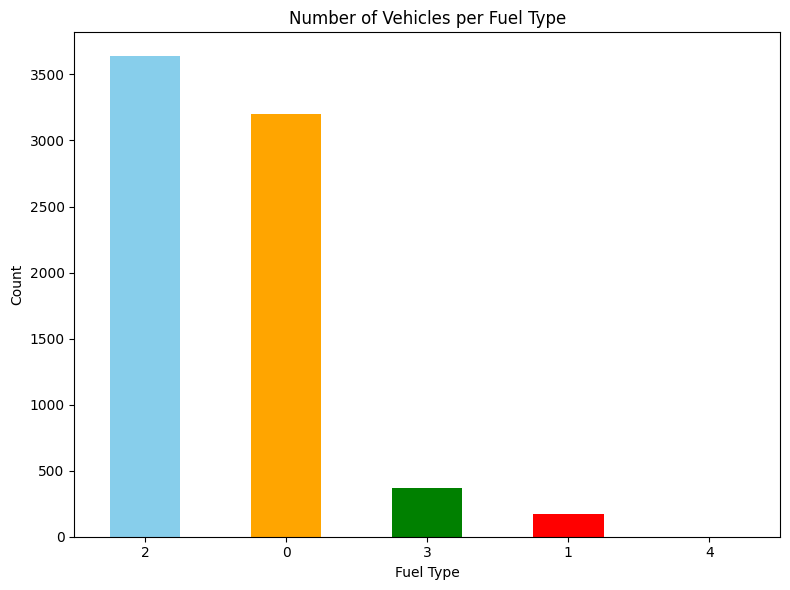

In [83]:
count_per_fuel_type = df['fuel_type'].value_counts()

# Definimos una lista de colores para cada barra
colores = ['skyblue', 'orange', 'green', 'red', 'purple']

# Graficamos el resultado
plt.figure(figsize=(8, 6))
count_per_fuel_type.plot(kind='bar', color=colores)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Number of Vehicles per Fuel Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# recordemos que: Z = 0, D = 1, X = 2, E = 3, N = 4

Ahora lo mismo con tranmission_type

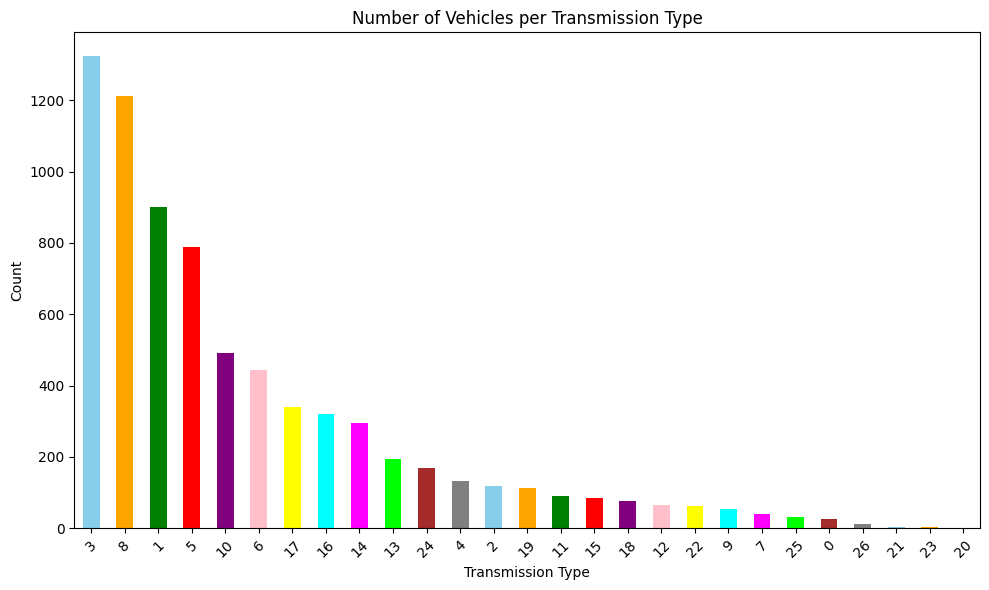

In [86]:
count_per_transmission = df['transmission'].value_counts()

# Definimos una lista de colores para cada barra
colores = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime', 'brown', 'gray']

# Graficamos el resultado
plt.figure(figsize=(10, 6))
count_per_transmission.plot(kind='bar', color=colores)
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Number of Vehicles per Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# recordemos que: AS5 = 0, M6 = 1, AV7 = 2, AS6 = 3, AM6 = 4, A6 = 5, AM7 = 6, AV8 = 7, AS8 = 8, A7 = 9, A8 = 10, 
# M7 = 11, A4 = 12,

Ahora vamos a ver la relación entre tamaño del motor y emisiones de CO2

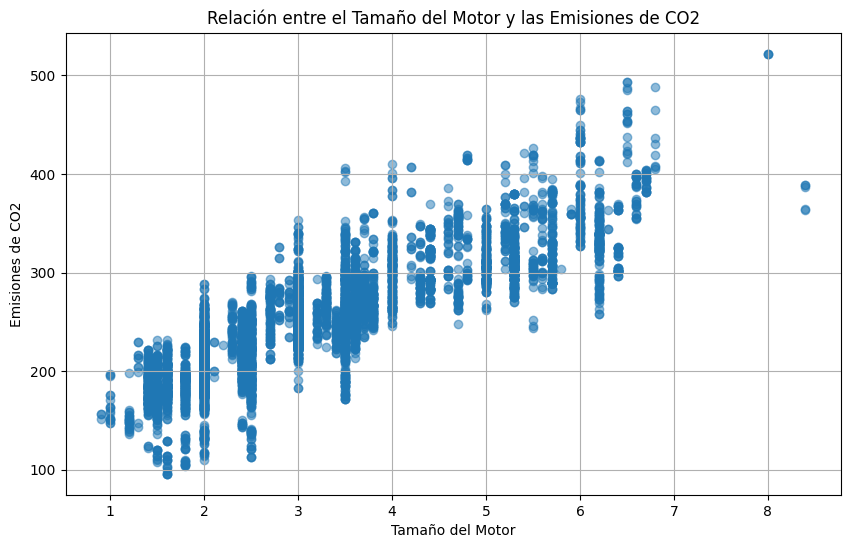

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine_size'], df['co2'], alpha=0.5)

# Agregar etiquetas y título
plt.title('Relación entre el Tamaño del Motor y las Emisiones de CO2')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Emisiones de CO2')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Ahora voy a hacer una mediana de las emisiones de co2 por tipo de combustible y voy a compararlos todos

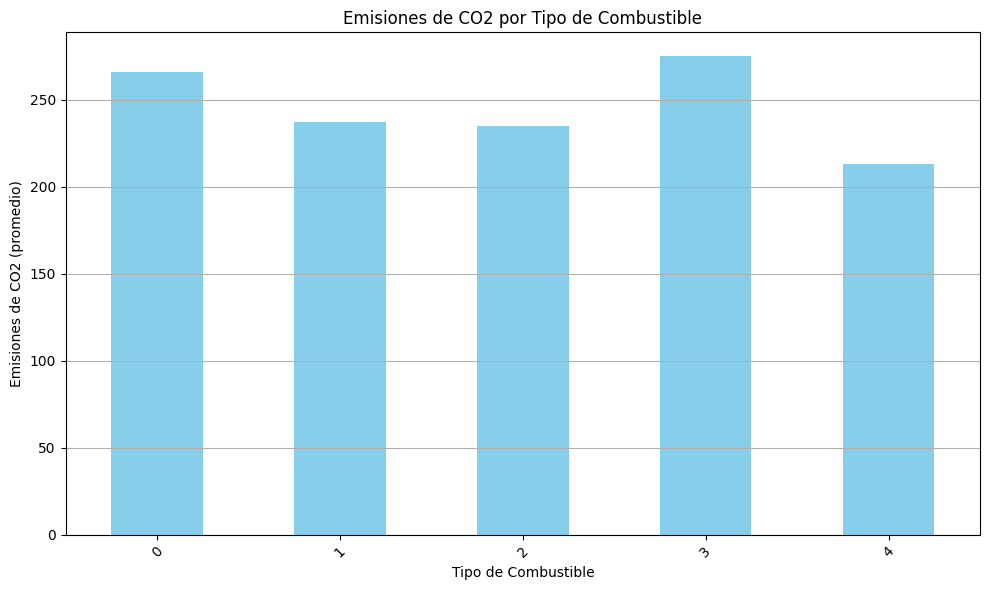

In [92]:
co2_por_combustible = df.groupby('fuel_type')['co2'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
co2_por_combustible.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.title('Emisiones de CO2 por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Emisiones de CO2 (promedio)')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ahora voy a comparar el tipo de motor con el consumo de combustible (fuel_cons_comb)

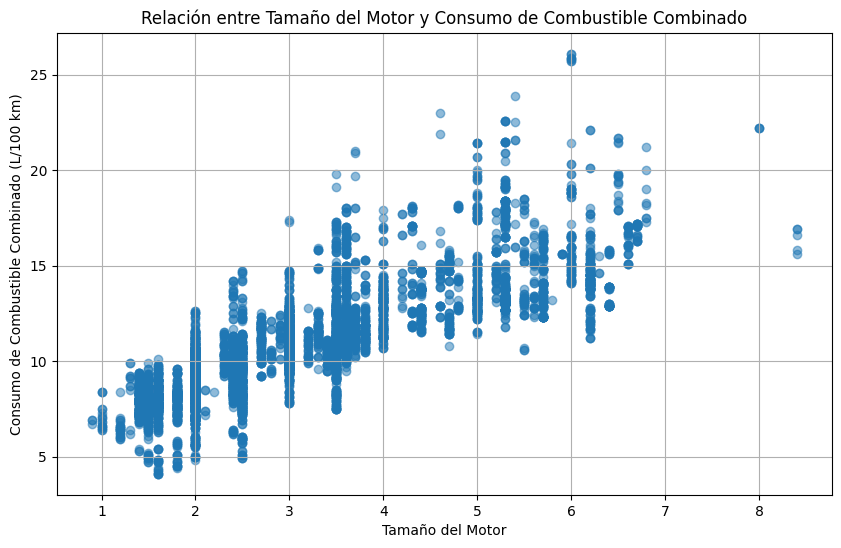

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine_size'], df['fuel_cons_comb'], alpha=0.5)

# Agregar etiquetas y título
plt.title('Relación entre Tamaño del Motor y Consumo de Combustible Combinado')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Consumo de Combustible Combinado (L/100 km)')

# Mostrar la gráfica
plt.grid(True)
plt.show()

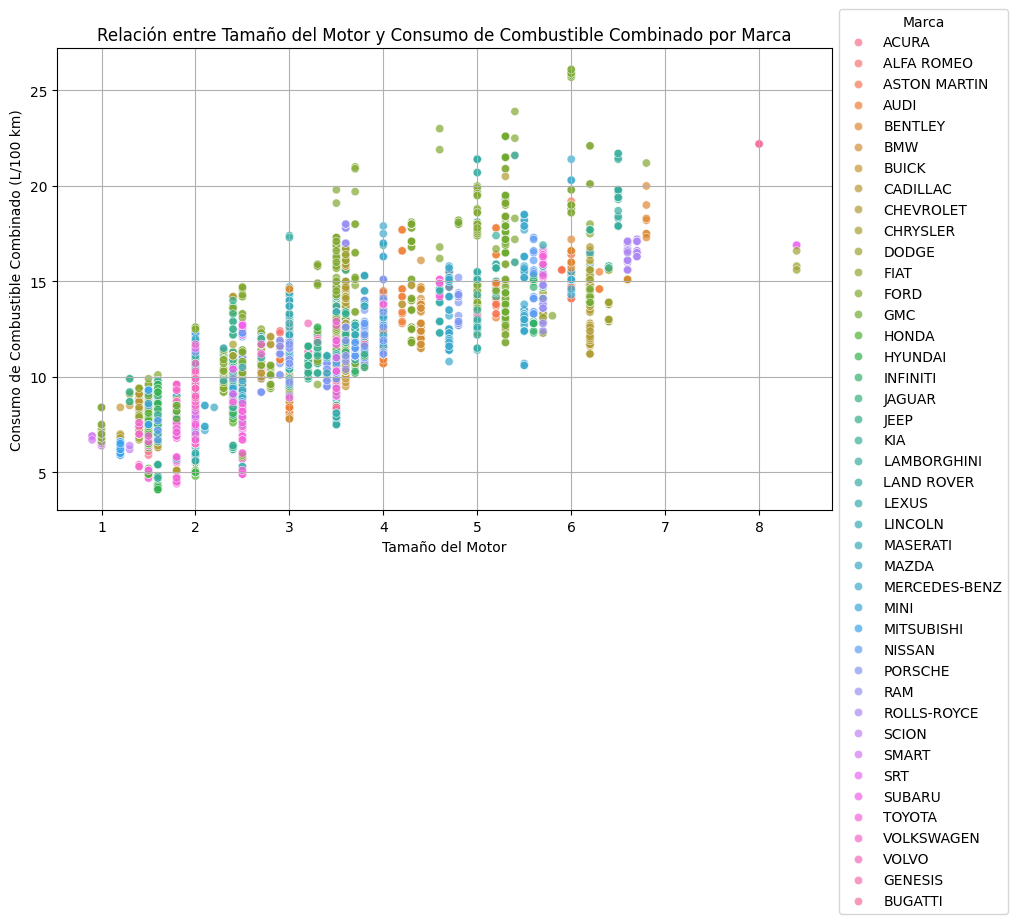

In [106]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='fuel_cons_comb', hue='make', data=df, alpha=0.7)

# Agregar etiquetas y título
plt.title('Relación entre Tamaño del Motor y Consumo de Combustible Combinado por Marca')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Consumo de Combustible Combinado (L/100 km)')

# Mostrar la leyenda debajo de la gráfica
plt.legend(title='Marca', bbox_to_anchor=(1, 1.1), loc='upper left')

# Mostrar la gráfica
plt.grid(True)
plt.show()